### 참고 사이트

+ https://matplotlib.org
+ https://seaborn.pydata.org

## 1. 기본 그래프(basic plot)

막대(bar), 선(line), 산포도(산점도, scatter plot), 히스토그램, 상자(box)

### (1) 질적 데이터

+ 요약방법 : 도표
+ 정리방법 : 도수 분포표, 분할표
+ 그래프 : 막대, 원, ...


### (2) 양적 데이터

+ 요약방법 : 수치
+ 정리방법 : 산술평균, 중앙값, ...
+ 그래프 : 히스토그램, 선(시계열 데이터), 산포도, Boxplot, ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 2. 선 그래프

<AxesSubplot:>

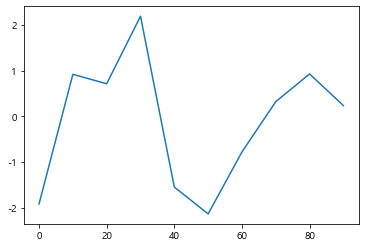

In [13]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
s

s.plot()

<AxesSubplot:>

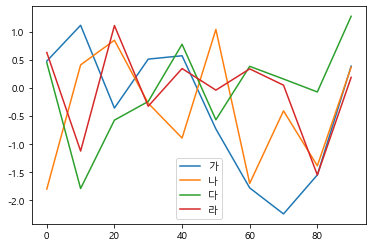

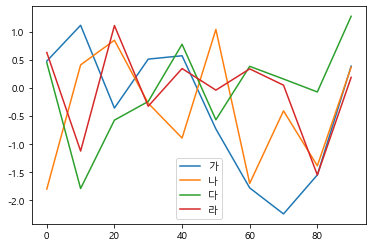

In [14]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=["가", "나", "다", "라"],
                 index=np.arange(0, 100, 10))
df.plot()
df.plot.line()

## 3. 막대 그래프

<AxesSubplot:>

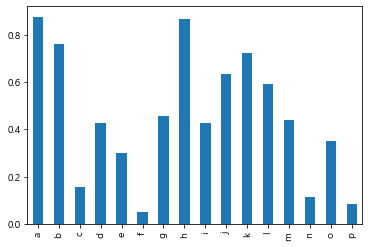

In [22]:
s = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s

s.plot(kind="bar")
s.plot.bar()

<AxesSubplot:>

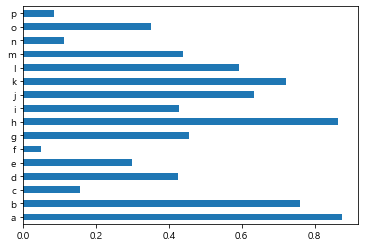

In [24]:
s.plot(kind="barh")
s.plot.barh()

<AxesSubplot:>

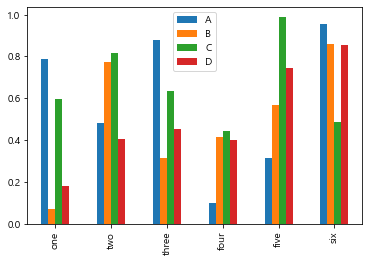

In [30]:
df = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three",
                                              "four", "five", "six"],
                 columns=["A", "B", "C", "D"])

df
df.plot(kind="bar")

<AxesSubplot:>

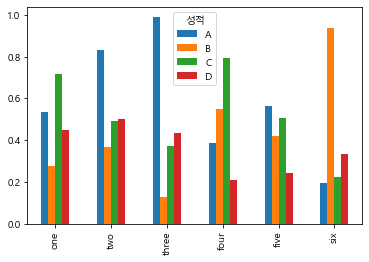

In [31]:
df = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three",
                                              "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="성적"))

df
df.plot(kind="bar")

<AxesSubplot:>

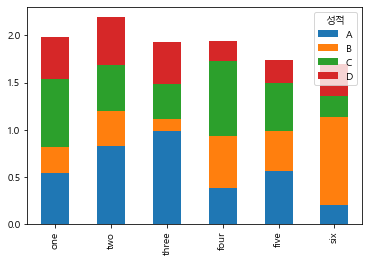

In [32]:
df.plot(kind="bar", stacked= True)

<AxesSubplot:>

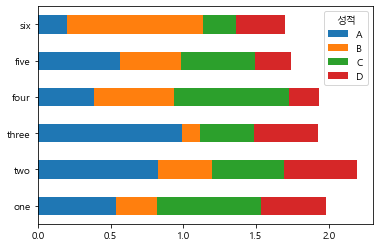

In [33]:
df.plot(kind="barh", stacked= True)

## 4. 히스토그램

+ 값만 필요하고 인덱스는 필요없다.
+ 숫자 형태의 데이터값을 범주형 변수로 활용할 때 사용

<AxesSubplot:>

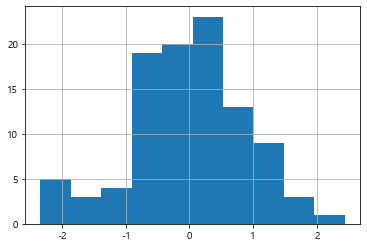

In [35]:
s = pd.Series(np.random.normal(0, 1, size=100))
s

s.hist()

<AxesSubplot:>

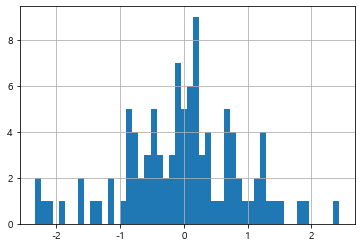

In [36]:
s.hist(bins=50)

## 4. 산점도(산포도, scatter plot)

+ 두 변수의 관계를 확인

<AxesSubplot:xlabel='x1', ylabel='x2'>

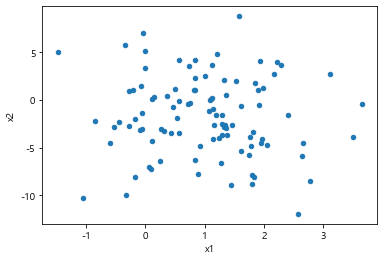

In [44]:
x1 = np.random.normal(1, 1, size=(100, 1))
x1

x2 = np.random.normal(-2, 4, size=(100, 1))
x2

x = np.concatenate((x1, x2), axis = 1)
x[:5]

df = pd.DataFrame(x, columns=["x1", "x2"])
df

df.plot.scatter("x1", "x2")

## 상자 그래프(box plot)\

+ five-number summary
    - 최소값, 최대값, 1사분위, 2사분위, 3사분위

<AxesSubplot:>

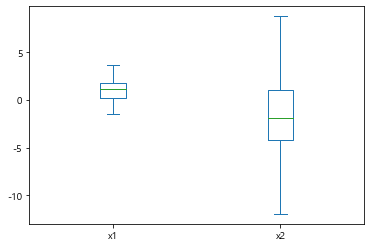

In [46]:
df.plot.box()

## 7. 활용 예제
+ tips 샘플

In [47]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, '식사 대금에 대한 히스토그램')

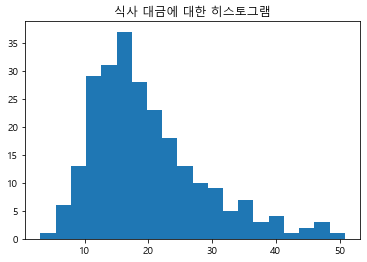

In [53]:
##### total_bill에 대한 금액 분포 확인

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(tips["total_bill"], bins=30)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

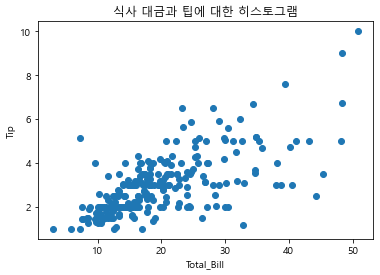

In [72]:
##### total_bill 과 tip의 관계를 알고 싶다.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips.tip)
ax.set_title("식사 대금과 팁에 대한 히스토그램")
ax.set_xlabel("Total_Bill")
ax.set_ylabel("Tip")

In [68]:
##### 성별과 팁의 관계

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]==["Male"]["tip"], 
            tips[tips["sex"]==["Female"]["tip"]], labels=["남성", "여성"])

SyntaxError: invalid syntax (3955385328.py, line 7)

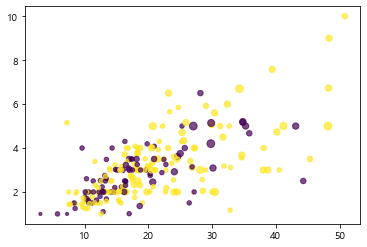

In [77]:
##### 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1

tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head(10)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"],
          alpha=0.7, s=tips["size"]*10)

## 8. 활용 예제2

+ 전국 신규 민간아파트 분양 가격 동향
+ https://data.go.kr

### (1) Data Definition

In [5]:
apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


### (2) Data Preprocessing

In [7]:
##### Column의 이름을 영어로 변경(city, size, year, month, price)

apt1 = apt[:]
apt1.columns = ["city", "size", "year", "month", "price"]
apt1.head()

,city,size,year,month,price
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [8]:
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [16]:
##### price는 숫자로 데이터 타입 변경
apt1["price"] = pd.to_numeric(apt1["price"].str.strip())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [17]:
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


### (3) Visualization

In [25]:
##### 서울과 전체 사이즈만 조회

apt1_seoul = apt1[(apt1["city"] == "서울") & (apt1["size"] == "전체")]

# apt1.query('(city=="서울") and (size=="전체")')

In [26]:
apt1_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    54 non-null     object 
 1   size    54 non-null     object 
 2   year    54 non-null     int64  
 3   month   54 non-null     int64  
 4   price   54 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ KB


In [41]:
##### city, size 컬럼 삭제하고 year롸 month는 다중 index로 

apt1_seoul1 = apt1_seoul[:]
# del apt1_seoul1["city"]
# del apt1_seoul1["size"]

apt1_seoul1 = apt1_seoul1.drop(["city", "size"], axis=1)
apt1_seoul1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [42]:
apt1_seoul1 = apt1_seoul1.set_index(["year", "month"])

<AxesSubplot:xlabel='year,month'>

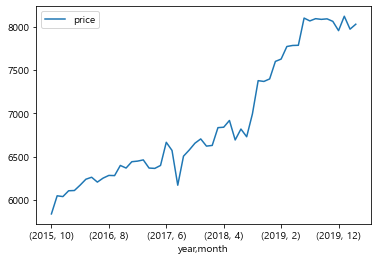

In [43]:
apt1_seoul1.plot()

## 9.Seaborn

In [44]:
tips = sns.load_dataset("tips")

C:\Users\dbs03\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

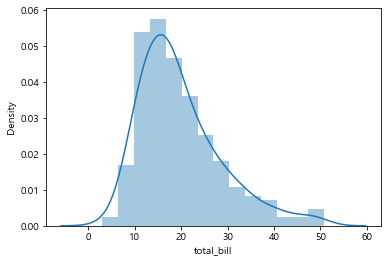

In [47]:
##### total_bill에 대한 금액 분포 환인

sns.distplot(tips["total_bill"])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

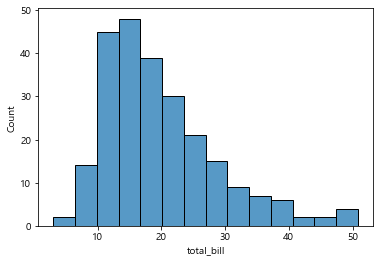

In [48]:
sns.histplot(tips["total_bill"])

C:\Users\dbs03\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

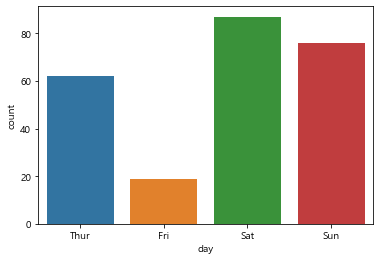

In [49]:
##### 요일별로 인원 수 파악
sns.countplot("day", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

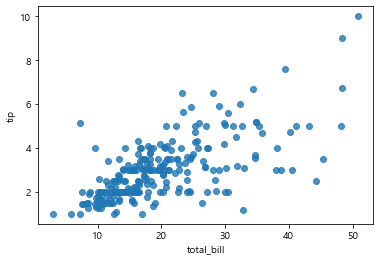

In [50]:
##### total_bill과 tip의 관계를 알고 싶다

sns.regplot(x="total_bill", y="tip", data = tips, fit_reg=False)

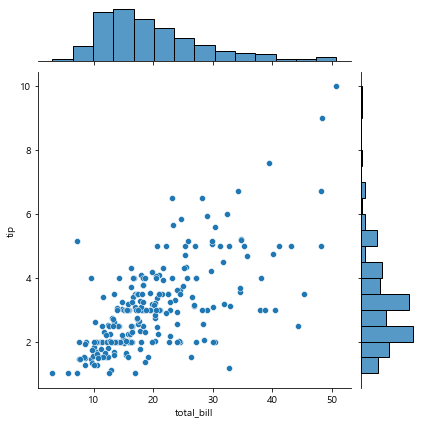

In [51]:
sns.jointplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

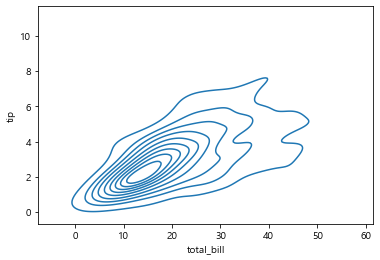

In [52]:
sns.kdeplot(x="total_bill", y="tip", data=tips, shade=True)

<AxesSubplot:xlabel='time', ylabel='tip'>

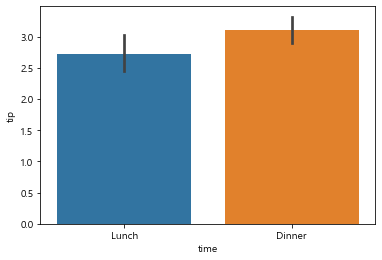

In [55]:
##### 시간에 따른 식사대금
sns.barplot(x="time", y="tip", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

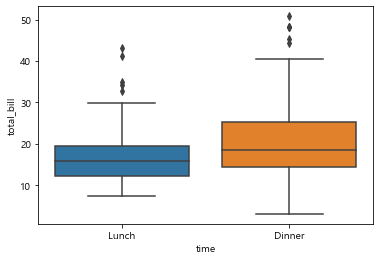

In [58]:
sns.boxplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

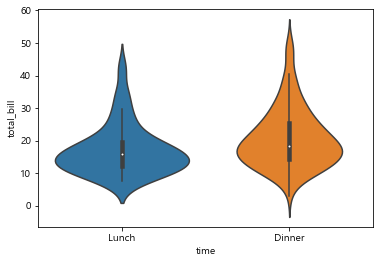

In [59]:
sns.violinplot(x="time", y="total_bill", data=tips)

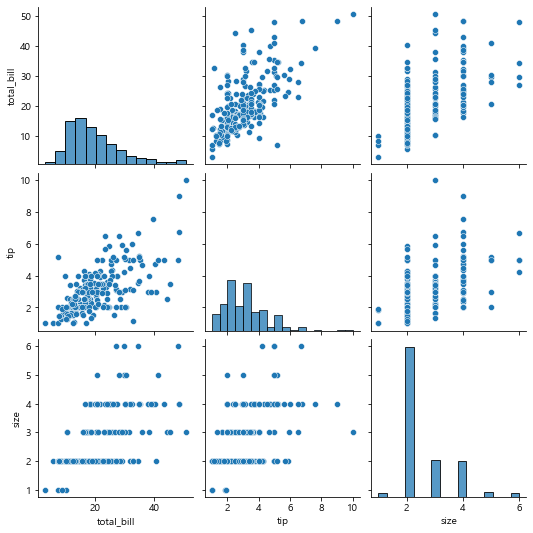

In [60]:
sns.pairplot(tips)

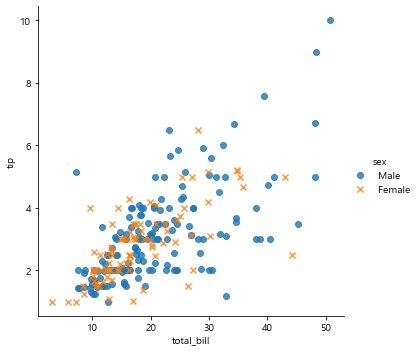

In [68]:
##### 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, 
           hue="sex", markers=["o", "x"])

## 10. 활용 예제3

+ 타이타닉
    - https://www.kaggle.com/c/titanic

### (1) Data Prepare

In [69]:
train = pd.read_csv("data/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## (2) EDA(Explorer Data Analysis)

In [77]:
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True)

In [71]:
train[train["Survived"] == 1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

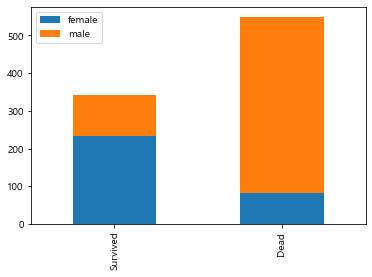

In [78]:
bar_chart("Sex")

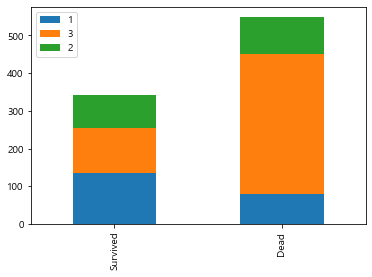

In [79]:
bar_chart("Pclass")

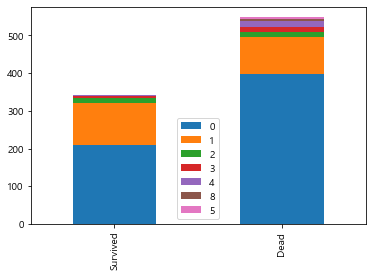

In [80]:
bar_chart("SibSp")

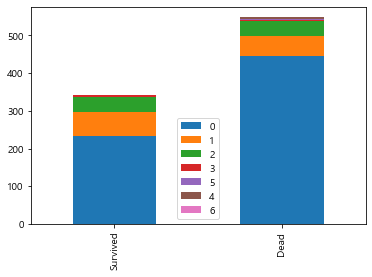

In [81]:
bar_chart("Parch")

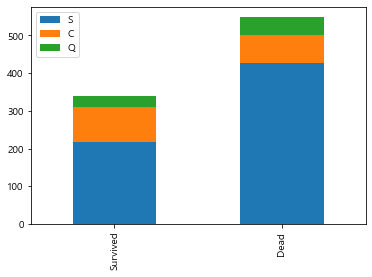

In [82]:
bar_chart("Embarked")

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
##### Name에서 호칭 부분 추출하기

train["title"] = train["Name"].str.extract(" ([a-zA-Z]+)\.")
train["title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: title, dtype: int64

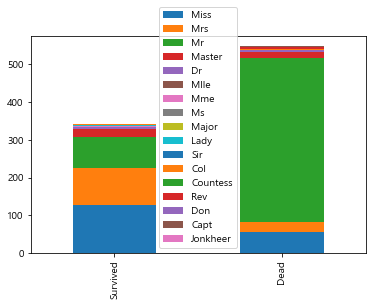

In [90]:
bar_chart("title")

In [91]:
title_mapping = {"Mr":0,
"Miss":1,
"Mrs":2,
"Master":3,
"Dr":3,
"Rev":3,
"Mlle":3,
"Major":3,
"Col":3,
"Countess":3,
"Capt":3,
"Ms":3,
"Sir":3,
"Lady":3,
"Mme":3,
"Don":3,
"Jonkheer":3   
}
train["title"] = train["title"].map(title_mapping)
train["title"].value_counts()

0    517
1    182
2    125
3     67
Name: title, dtype: int64

In [95]:
train["Age"].fillna(train.groupby("title")["Age"].transform("mean"), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


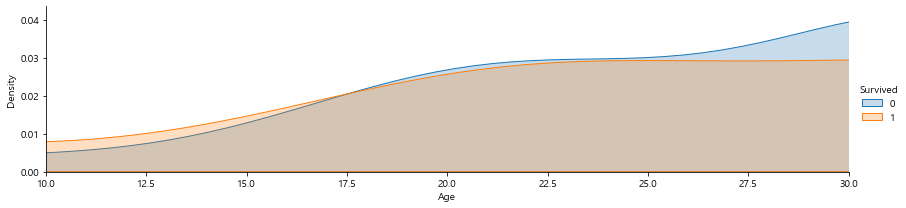

In [102]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
# facet.set(xlim=(0, train["Age"].max()))
facet.set(xlim=(10, 30))

## 11. 지도 시각화

+ pip install folium

In [103]:
import folium

In [107]:
folium.Map(location=[37.497955, 127.027619], zoom_start=15, tiles="Stamen Toner")

In [114]:
map = folium.Map(location=[40, -98], zoom_start=4)
map

In [112]:
##### 미국 50개주의 실업률 표시

state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [120]:
state_geo = "data/map/folium_us-states.json"
state_geo
map.choropleth(geo_data=state_geo, 
               data=state_unemp, 
               key_on="feature.id", 
               columns=["State", "Unemployment"],
               fill_color="YlGn")
map

C:\Users\dbs03\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [127]:
##### Marking
map = folium.Map(location=[37.497955, 127.027619], zoom_start=15)
map

marker = folium.Marker(location=[37.497955, 127.027619],
             icon=folium.Icon(color="red", icon="star"), 
                      popup="강남역에서 12시에 약속")

marker.add_to(map)
map

folium.CircleMarker(location=[37.497955, 127.027619], radius=50,
                   color="#ffffgg", fill_color="#fffggg").add_to(map)
map

In [132]:
map = folium.Map(location=[37.497955, 127.027619], zoom_start=15)
map

text = "많은양의 데이터가 있다고 가정"
iframe = folium.IFrame(text, width=300, height=200)
pop = folium.Popup(iframe, max_width=3000)


folium.Marker(location=[37.497955, 127.027619],
             icon=folium.Icon(color="red", icon="star"), 
                      popup=pop).add_to(map)
map